In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Antithetics

### __(8.4)__
Antithetic sampling with spiky integrands. We consider the ''spikey function''

$$  \begin{equation}
 f(x) =
   \left\{\begin{array}{lr}
       0, & 0 < x \le 0.9 \\
       100, & 0.9 < x \le 0.91\\
       0 & 0.91 < x < 1
    \end{array}\right.
 \end{equation}
$$

with $x\sim U(0,1)$

__(a)__
Determine whether antithetic sampling is helpful or harmful in this situation

For the simple MC method, we have $\hat{\mu} = \frac{1}{n}\sum_i^n f(x_i)$, with variance $\text{Var}(\hat{\mu}) = \frac{0.01}{n}$. Alternataively, for the antithetic estimate, we have $\mu_{a} = \frac{1}{n}\sum_{i=1}^{n/2} f(x_i) + f(1 - x_i)$, which has variance $\text{Var}(\hat{\mu}_a) = \frac{0.01 - 0.001}{n}$. This is only a slight improvement, which conceptually makes sense. The correlation of a spikey function with its antithetic partner should be negative, since $f(x)$ and $f(1 - x)$ do not have overlapping support. However, the area over which the spikes are nonzero is small, so the overall effect is negligeable.

__(b)__ Explain these findings using even/odd decomposition

Antithetic sampling is only effective for primarily odd functions, i.e. where $\sigma_E^2 << \sigma_O^2$. This function isn't really either in a dominant way, so the fact that the gain is small is not suprising.

__(c)__ Construct a spikey function where the conclusion is the opposite

A spikey function which is a single bump around $x = \frac{1}{2}$ will not benefit at all from antithetic sampling, as $\sigma_O^2 = 0$ in this case. Alternatively, the new function $g(x) = f(x) - f(1 - x)$ could be effectively sampled using antithetics, because it is entirely odd.

# Stratification

### __(8.7)__

Stratified Brownian Motion. Consider time steps $t_i \in {1/M, 2/M, ..., 1}$.  For path $i = 1, 2, ..., N$, the Brownian motion takes the value $B_i(t)$.  We stratify the Brownian motion on its endpoint, taking $B_i(1) = \Phi^{-1}(\frac{i - U_i}{N})$ for $U_i \sim U(0,1)$. Then $B_i(\frac{j}{M})$ for $j = 1, 2,... M$ is sampled conditionally on $B_i(1)$.

__(a)__
Write a function to generate stratified standard Brownian motion

First we generation brownian motion, not worrying about stratification for now:

In [4]:
def brownian_motion(M, n_samples):
    
    # Generates n_samples of Brownian motion starting at 0 
    # and stopping at 1, with time step 1/M

    increments = np.random.normal(0, np.sqrt(1/M), size=(n_samples, M))

    paths = increments.cumsum(axis=1)
    
    starts = np.zeros((paths.shape[0], 1))
    paths = np.hstack((starts, paths))


    return paths

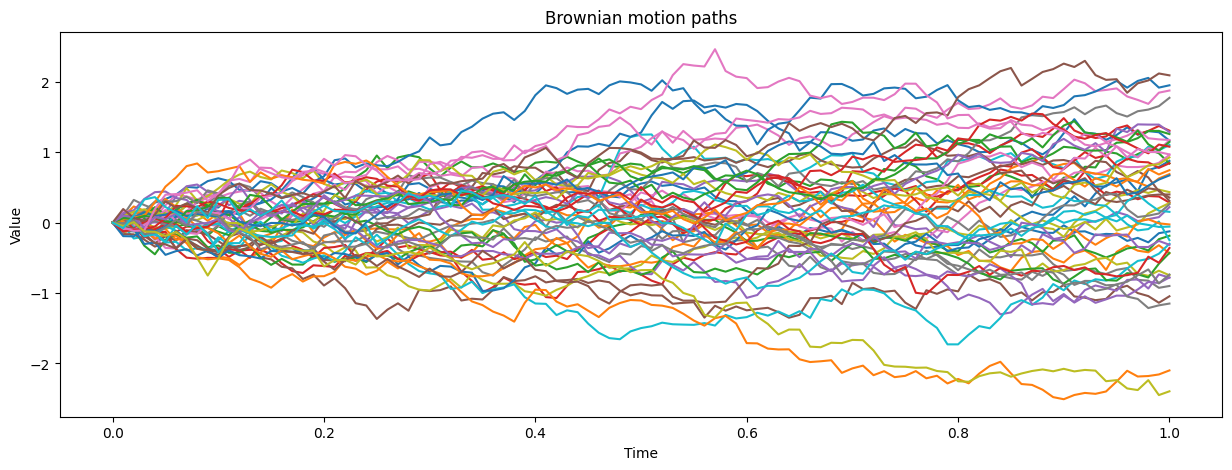

In [43]:
M = 100
n_samples = 50

BM = brownian_motion(M, n_samples)

plt.figure(figsize=(15, 5))

for i in range(BM.shape[0]):
    plt.plot(np.linspace(0, 1, M+1), BM[i], label=f' {i+1}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian motion paths')
plt.show()

Now we consider stratification. Basically we're being asked to draw an endpoint $b$ from a Gaussian distibution, and to generate Brownian motions which terminate at this end point.  When the end point is fixed, this is basically asking us to generate paths according to a Brownian bridge.  For a Brownian bridge process $X(t)$ terminating at $X(1) = b$, the probability density is defined by

$$
f_{X(t)}\big(x\big) = f_{W(t)}\big(x|W(1) = b\big) = \frac{1}{\sqrt{2\pi t(1 - t)}}\exp\Big[-\frac{(x - bt)^2}{2t(1-t)}\Big],
$$

and it is straightforward to show that the process $X(t) = W(t) - tW(1) + tb$ has this distribution. In a slight change of notation from the problem, $b$ is the endpoint which we will draw from the Gaussian distribtion, and $W$ is the Brownian motion.

We break the problem into $N$ strata and generate one sample path per strata. The strata are the intervals $[\Phi^{-1}(\frac{i-1}{N}), \Phi^{-1}(\frac{i}{N})]$, covering the real line. The probability of an endpoint lying in a particular strata is just $\frac{1}{N}$.

In [74]:
def strat_brownian_motion(N, M):

    '''

    N: Number of strata. One path is generated per strata.
    M: Resolution of mesh from [0,1]
    
    '''
    time = np.linspace(0, 1, M+1)
    
    W = brownian_motion(M, N) # generate standard brownian motion. shape = (samples, time)

    b_i = norm.ppf((np.arange(1, N+1) - np.random.uniform(0, 1, size=N)) / N)

    paths = W - np.outer(W[:,-1], time) + np.outer(b_i, time)
    
    return paths
    

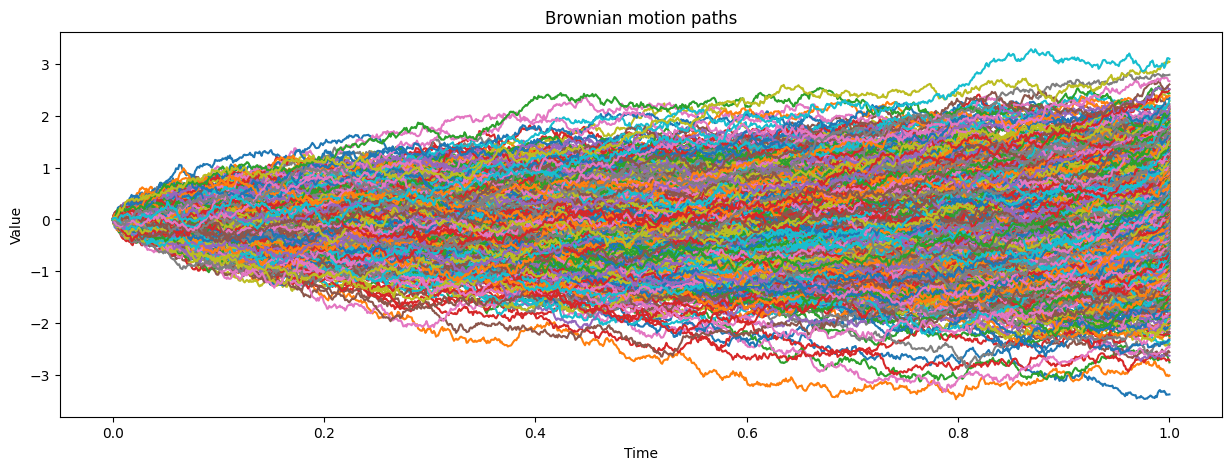

In [99]:
N = 1000
M = 1000
strat_BM = strat_brownian_motion(N, M)

plt.figure(figsize=(15,5))

for i in range(strat_BM.shape[0]):
    plt.plot(np.linspace(0, 1, M+1), strat_BM[i], label=f' {i+1}')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian motion paths')
plt.show()

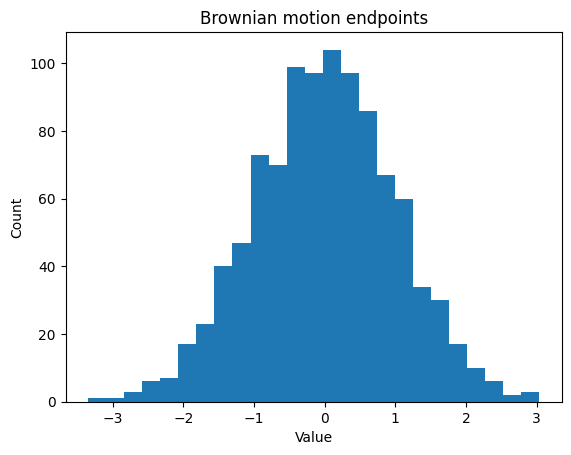

In [100]:
#Sanity check on normality of arbitrary time point, e.g. pick 5th to last

plt.hist(strat_BM[:, -5], 25);

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Brownian motion endpoints')
plt.show()

__(b)__ Generalize your function to generate stratified Brownian motion with drift $\delta$ and volatility $\sigma\geq 0$.

In [ ]:
### TBD